**12-03-2022**

In [1]:
pip install xgboost

In [2]:
import xgboost as xgb

In [3]:
from xgboost import XGBClassifier

In [4]:
model=XGBClassifier()

In [5]:
from sklearn.datasets import load_iris
data=load_iris()
X,y=load_iris(return_X_y=True)

In [6]:
feature_names=load_iris().feature_names
target_names=load_iris().target_names

In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=7)

In [10]:
model.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [11]:
predictions=model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88        16
   virginica       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



In [13]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print("Accuracy=%.2f%%" %(accuracy*100))

Accuracy=91.11%


In [14]:
y_test.shape

(45,)

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


In [16]:
labels=data["target_names"]
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

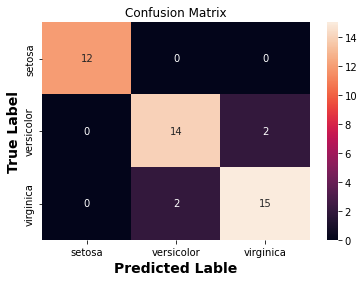

In [18]:
cm=metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(6,4))
ax=sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True)
plt.title("Confusion Matrix")
plt.ylabel('True Label',fontweight='bold',fontsize=14)
plt.xlabel('Predicted Lable',fontweight='bold',fontsize=14)
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_test,y_test,cv=5) #cross validation score
score

array([0.88888889, 0.66666667, 0.88888889, 1.        , 1.        ])

In [20]:
score.mean()

0.888888888888889